<a href="https://colab.research.google.com/github/BalkeesRekik/DS2002/blob/main/SQLite_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Database created
Tables created
All students' names and their grades:
('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 78)
('Carol', 'White', 84)
('Carol', 'White', 75)
('David', 'Brown', 88)
('David', 'Brown', 90)
('David', 'Brown', 92)
('Eve', 'Davis', 74)
('Eve', 'Davis', 85)
('Eve', 'Davis', 79)
Average grade for each student:
First Name: Alice, Last Name: Johnson, Average Grade: 91.0
First Name: Bob, Last Name: Smith, Average Grade: 81.0
First Name: Carol, Last Name: White, Average Grade: 79.0
First Name: David, Last Name: Brown, Average Grade: 90.0
First Name: Eve, Last Name: Davis, Average Grade: 79.33333333333333
Student with the highest average grade:
First Name: Alice, Last Name: Johnson, Average Grade: 91.0
Average grade for Math: 83.4
Students who scored above 90 in any subject:
First Name: Alice, Last Name: Johnson, Subject: Math
First Name: David, Last Name: Brown, 

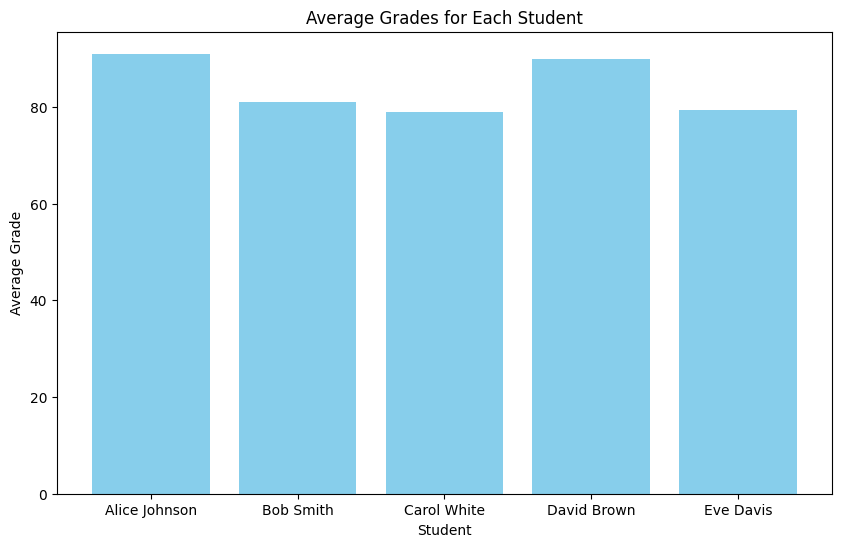

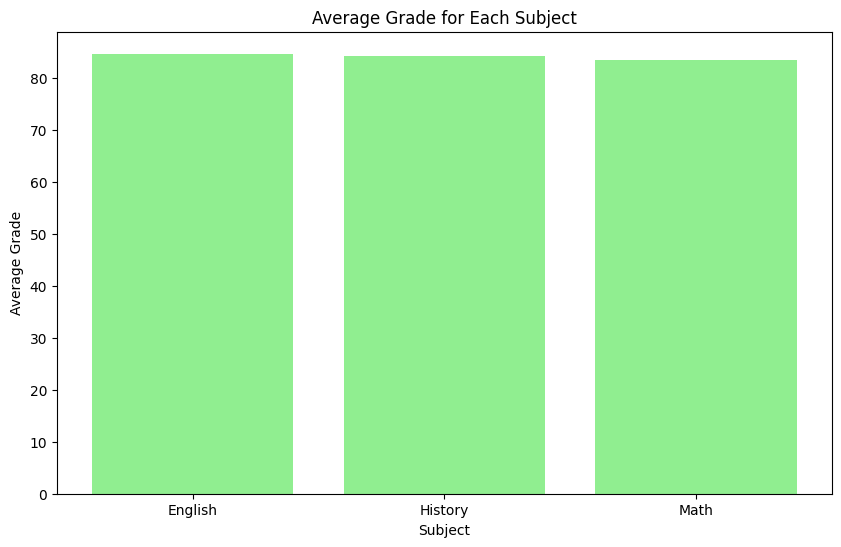

Students with the highest grade in each subject:
  first_name last_name  subject  grade
0      Alice   Johnson     Math     95
1      David     Brown  English     90
2      David     Brown  History     92


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#1

connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

print("Database created")


#2

cursor.execute('''
    CREATE TABLE IF NOT EXISTS students (
        student_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT,
        last_name TEXT
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS grades (
        grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INTEGER,
        subject TEXT,
        grade INTEGER,
        FOREIGN KEY (student_id) REFERENCES students(student_id)
    )
''')

print("Tables created")


#3

students_data = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]

cursor.executemany('''
    INSERT INTO students (student_id, first_name, last_name)
    VALUES (?, ?, ?)
''', students_data)


grades_data = [
    (1, 1, 'Math', 95),
    (2, 1, 'English', 88),
    (3, 1, 'History', 90),
    (4, 2, 'Math', 82),
    (5, 2, 'English', 76),
    (6, 2, 'History', 85),
    (7, 3, 'Math', 78),
    (8, 3, 'English', 84),
    (9, 3, 'History', 75),
    (10, 4, 'Math', 88),
    (11, 4, 'English', 90),
    (12, 4, 'History', 92),
    (13, 5, 'Math', 74),
    (14, 5, 'English', 85),
    (15, 5, 'History', 79)
]

cursor.executemany('''
    INSERT INTO grades (grade_id, student_id, subject, grade)
    VALUES (?, ?, ?, ?)
''', grades_data)


connection.commit()


#4
#i

query = """
SELECT students.first_name, students.last_name, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id;
"""

cursor.execute(query)
rows = cursor.fetchall()

print("All students' names and their grades:")
for row in rows:
    print(row)


#ii
average_grades_query = """
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id;
"""
cursor.execute(average_grades_query)
average_grades = cursor.fetchall()

print("Average grade for each student:")
for row in average_grades:
    print(f"First Name: {row[0]}, Last Name: {row[1]}, Average Grade: {row[2]}")


#iii
highest_average_grade_query = """
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1;
"""

cursor.execute(highest_average_grade_query)

top_student = cursor.fetchone()

print(f"Student with the highest average grade:")
print(f"First Name: {top_student[0]}, Last Name: {top_student[1]}, Average Grade: {top_student[2]}")


#iv
average_math_grade_query = """
SELECT AVG(grade) AS average_math_grade
FROM grades
WHERE subject = 'Math';
"""

cursor.execute(average_math_grade_query)

math_average = cursor.fetchone()

print(f"Average grade for Math: {math_average[0]}")


#v
high_scorers_query = """
SELECT students.first_name, students.last_name, grades.subject
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90;
"""

cursor.execute(high_scorers_query)

high_scorers = cursor.fetchall()

print("Students who scored above 90 in any subject:")
for scorer in high_scorers:
    print(f"First Name: {scorer[0]}, Last Name: {scorer[1]}, Subject: {scorer[2]}")


#5
#i
students_df = pd.read_sql_query("SELECT * FROM students", connection)

grades_df = pd.read_sql_query("SELECT * FROM grades", connection)

print("Students DataFrame:")
print(students_df)

print("Grades DataFrame:")
print(grades_df)

#ii
combined_query = """
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id;
"""

combined_df = pd.read_sql_query(combined_query, connection)

print("Combined DataFrame (Student Name, Subject, and Grade):")
print(combined_df)


#iii
average_grades_df = pd.read_sql_query(average_grades_query, connection)

average_grades_df['full_name'] = average_grades_df['first_name'] + ' ' + average_grades_df['last_name']

plt.figure(figsize=(10, 6))
plt.bar(average_grades_df['full_name'], average_grades_df['average_grade'], color='skyblue')
plt.title('Average Grades for Each Student')
plt.xlabel('Student')
plt.ylabel('Average Grade')

plt.show()


#iv
average_subject_grade_query = """
SELECT subject, AVG(grade) AS average_grade
FROM grades
GROUP BY subject;
"""
average_subject_grades_df = pd.read_sql_query(average_subject_grade_query, connection)

plt.figure(figsize=(10, 6))
plt.bar(average_subject_grades_df['subject'], average_subject_grades_df['average_grade'], color='lightgreen')
plt.title('Average Grade for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade')

plt.show()


#BONUS

highest_grade_query = """
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE (subject, grade) IN (
    SELECT subject, MAX(grade)
    FROM grades
    GROUP BY subject
);
"""

top_students_df = pd.read_sql_query(highest_grade_query, connection)

print("Students with the highest grade in each subject:")
print(top_students_df)

top_students_df['full_name'] = top_students_df['first_name'] + ' ' + top_students_df['last_name']

subjects = top_students_df['subject'].unique()
students = top_students_df['full_name'].unique()


#I gave up on the bar chart :(

connection.close()